In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:
from sklearn.model_selection import train_test_split

df_filtrado = pd.read_csv("C:\\Users\\Gabriel\\Documents\\Faculdade\\TCC\\Cod\\df_filtrado.csv")

df_filtrado['fico_range_avg'] = (df_filtrado['fico_range_low'] + df_filtrado['fico_range_high']) / 2

df_filtrado['loan_status_bin'] = df_filtrado['loan_status'].apply(
    lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)','Does not meet the credit policy. Status:Charged Off'] else 0
)

var_x = ['loan_amnt', 'home_ownership', 'purpose', 'addr_state', 'verification_status', \
                    'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'emp_length', 'fico_range_avg']

x = df_filtrado.loc[:, var_x]
y = df_filtrado['loan_status_bin']

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.15, random_state=0)

In [3]:
df_filtrado.shape

(2111997, 16)

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder

categoricas = ['home_ownership', 'purpose', 'addr_state', 'verification_status', 'emp_length']
numericas = ['loan_amnt', 'annual_inc', 'dti', 'fico_range_avg', 'open_acc', 'revol_bal', 'revol_util']

#Label Encoder = Ordinal Encoder
#Normalização = MinMaxScaler
#Padronização = Standart Scaler

preprocessador1 = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numericas),
    ('cat', OrdinalEncoder(), categoricas)
], sparse_threshold=0)

preprocessador2 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OrdinalEncoder(), categoricas)
], sparse_threshold=0)

preprocessador3 = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
], sparse_threshold=0)

preprocessador4 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
], sparse_threshold=0)

preprocessadores = {
    'preprocessador 1': preprocessador1,
    'preprocessador 2': preprocessador2,
    'preprocessador 3': preprocessador3,
    'preprocessador 4': preprocessador4
}

In [8]:
#------------------------Naive Bayes Treinamento
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline


pipelineNB = Pipeline([
        ("preprocessador", preprocessador4),
        ("modelo", GaussianNB())
    ])

pipelineNB.fit(x_treinamento, y_treinamento)

joblib.dump(pipelineNB, 'NaiveBayes_treinado.pkl')



['NaiveBayes_treinado.pkl']

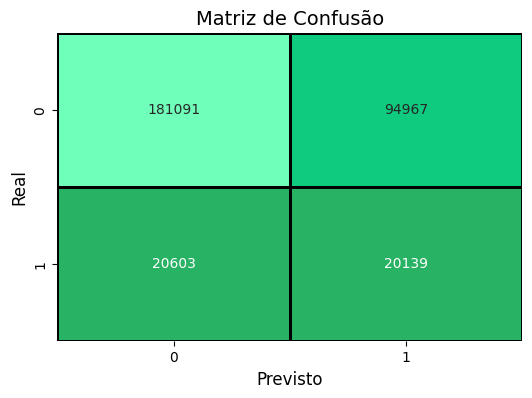

In [9]:
#------------------------Naive Bayes Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = sns.color_palette(["#28b263", "#0ecb80", "#03ff9c", "#70ffba"], as_cmap=True)

y_pred = pipelineNB.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_colors,
    cbar=False,
    linewidths=1,
    linecolor='black',
    vmax=cm.max() + 1
)

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [10]:
#------------------------DecisionTree Treinamento
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
    
pipelineDT = Pipeline([
        ("preprocessador", preprocessador4),
        ("modelo", DecisionTreeClassifier(class_weight='balanced', random_state=0))
    ])


pipelineDT.fit(x_treinamento, y_treinamento)

joblib.dump(pipelineDT, 'DecisionTree_treinado.pkl')

['DecisionTree_treinado.pkl']

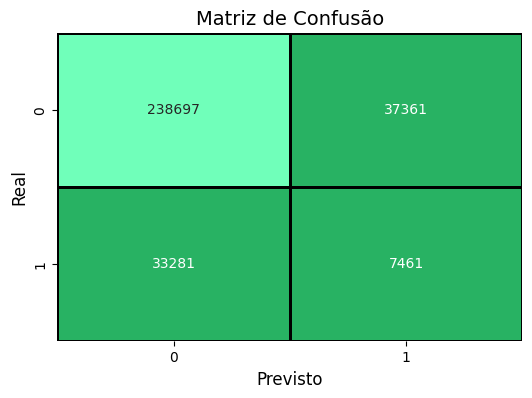

In [11]:
#------------------------Decision Tree Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = sns.color_palette(["#28b263", "#0ecb80", "#03ff9c", "#70ffba"], as_cmap=True)

y_pred = pipelineDT.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_colors,
    cbar=False,
    linewidths=1,
    linecolor='black',
    vmax=cm.max() + 1
)

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [12]:
#------------------------RandomForest Treinamento
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipelineRF = Pipeline([
        ("preprocessador", preprocessador4),
        ("modelo", RandomForestClassifier(n_estimators=100, class_weight='balanced', min_samples_leaf=7, min_samples_split=2))
    ])

pipelineRF.fit(x_treinamento, y_treinamento)

joblib.dump(pipelineRF, 'RandomForest_treinado.pkl')

['RandomForest_treinado.pkl']

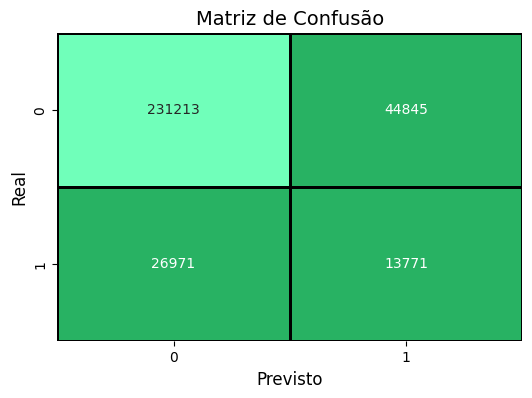

In [13]:
#------------------------Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = sns.color_palette(["#28b263", "#0ecb80", "#03ff9c", "#70ffba"], as_cmap=True)

y_pred = pipelineRF.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_colors,
    cbar=False,
    linewidths=1,
    linecolor='black',
    vmax=cm.max() + 1
)

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [17]:
#------------------------SVM Treinamento
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

amostra = x.copy()
amostra['target'] = y
amostra = amostra.sample(50000, random_state=0)

x_sample = amostra.drop('target', axis=1)
y_sample = amostra['target']

x_treinamento_sample, x_teste_sample, y_treinamento_sample, y_teste_sample = train_test_split(x_sample, y_sample, test_size=0.15, random_state=0)

pipelineSVM = Pipeline([
        ("preprocessador", preprocessador4),
        ("modelo", SVC(kernel='poly', C=1.5, probability=True, class_weight='balanced'))
    ])

pipelineSVM.fit(x_treinamento_sample, y_treinamento_sample)

joblib.dump(pipelineSVM, 'SVM_treinado.pkl')


['SVM_treinado.pkl']

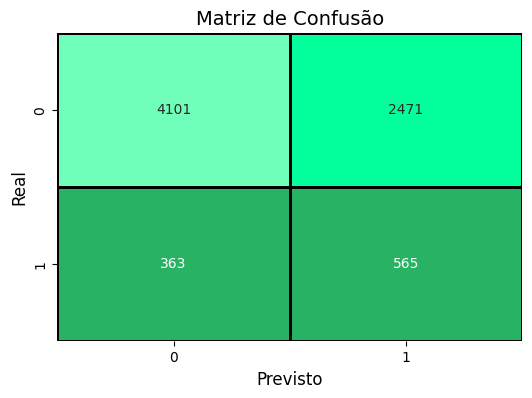

In [18]:
#------------------------SVM Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = sns.color_palette(["#28b263", "#0ecb80", "#03ff9c", "#70ffba"], as_cmap=True)

y_pred = pipelineSVM.predict(x_teste_sample)
cm = confusion_matrix(y_teste_sample, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_colors,
    cbar=False,
    linewidths=1,
    linecolor='black',
    vmax=cm.max() + 1
)

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [6]:
#------------------------Linear SVM Treinamento
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

pipelineLSVM = Pipeline([
        ("preprocessador", preprocessador4),
        ("modelo", LinearSVC(C=1, class_weight='balanced'))
    ])

pipelineLSVM.fit(x_treinamento, y_treinamento)

previsoresLSVM= pipelineLSVM.predict(x_teste)
scores = pipelineLSVM.decision_function(x_teste)
probLSVM = 1 / (1 + np.exp(-scores))
probLSVM = np.vstack([1 - probLSVM, probLSVM]).T
prob_inadimplente = probLSVM[:, 1]


joblib.dump(pipelineLSVM, 'LSVM_treinado.pkl')



['LSVM_treinado.pkl']

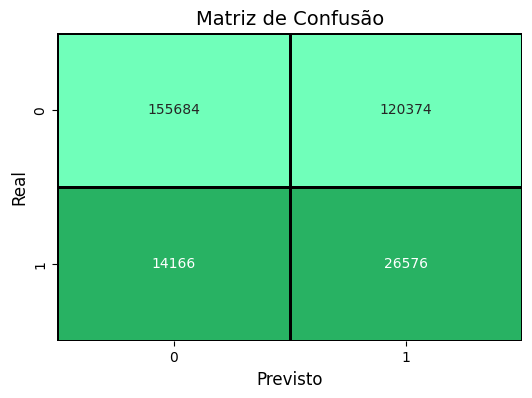

In [38]:
#------------------------Linear SVM Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = sns.color_palette(["#28b263", "#0ecb80", "#03ff9c", "#70ffba"], as_cmap=True)

y_pred = pipelineLSVM.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_colors,
    cbar=False,
    linewidths=1,
    linecolor='black',
    vmax=cm.max() + 1
)

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [51]:
#------------------------MLP Treinamento
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import joblib

amostra = x.copy()
amostra['target'] = y
amostra = amostra.sample(2111997, random_state=0)

x_sample = amostra.drop('target', axis=1)
y_sample = amostra['target']

x_treinamento_sample, x_teste_sample, y_treinamento_sample, y_teste_sample = train_test_split(
    x_sample, y_sample, test_size=0.15, random_state=0
)

train_df = pd.concat([x_treinamento_sample, y_treinamento_sample], axis=1)

classe_0 = train_df[train_df['target'] == 0]
classe_1 = train_df[train_df['target'] == 1]

fator = round(len(classe_0) / len(classe_1))

classe_1_dup = pd.concat([classe_1] * fator, ignore_index=True)

balanced_df = pd.concat([classe_0, classe_1_dup], ignore_index=True)
x_bal = balanced_df.drop('target', axis=1)
y_bal = balanced_df['target']

pipelineMLP = Pipeline([
    ("preprocessador", preprocessador1),
    ("modelo", MLPClassifier(
        hidden_layer_sizes=(64, 64),
        max_iter=2000,
        learning_rate_init=0.001,
        alpha=0.0005,
        tol=0.00001,
        random_state=0,
        verbose=True,
        activation='logistic'
    ))
])

pipelineMLP.fit(x_bal, y_bal)

joblib.dump(pipelineMLP, 'MLP_treinado.pkl')


Iteration 1, loss = 0.66226013
Iteration 2, loss = 0.65891993
Iteration 3, loss = 0.65774670
Iteration 4, loss = 0.65688304
Iteration 5, loss = 0.65651302
Iteration 6, loss = 0.65624880
Iteration 7, loss = 0.65605929
Iteration 8, loss = 0.65590061
Iteration 9, loss = 0.65570527
Iteration 10, loss = 0.65557183
Iteration 11, loss = 0.65548722
Iteration 12, loss = 0.65535905
Iteration 13, loss = 0.65531602
Iteration 14, loss = 0.65525443
Iteration 15, loss = 0.65511774
Iteration 16, loss = 0.65514004
Iteration 17, loss = 0.65510191
Iteration 18, loss = 0.65503020
Iteration 19, loss = 0.65500650
Iteration 20, loss = 0.65496056
Iteration 21, loss = 0.65493662
Iteration 22, loss = 0.65491307
Iteration 23, loss = 0.65494519
Iteration 24, loss = 0.65492387
Iteration 25, loss = 0.65485361
Iteration 26, loss = 0.65481680
Iteration 27, loss = 0.65480138
Iteration 28, loss = 0.65483296
Iteration 29, loss = 0.65476841
Iteration 30, loss = 0.65473268
Iteration 31, loss = 0.65476263
Iteration 32, los

['MLP_treinado.pkl']

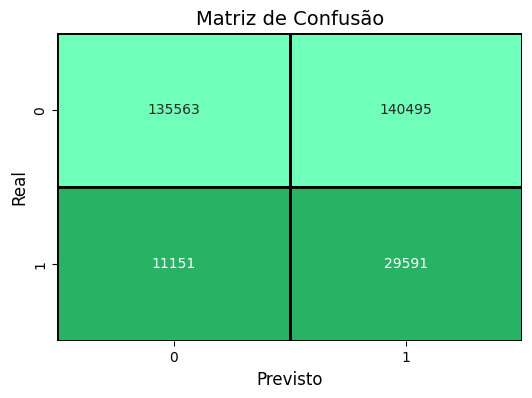

In [52]:
#------------------------MLP Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = sns.color_palette(["#28b263", "#0ecb80", "#03ff9c", "#70ffba"], as_cmap=True)

y_pred = pipelineMLP.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap=custom_colors,
    cbar=False,
    linewidths=1,
    linecolor='black',
    vmax=cm.max() + 1
)

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [24]:
novos_dados = pd.DataFrame([{
    'loan_amnt': 10000.0,
    'home_ownership': 'RENT',
    'purpose': 'credit_card',
    'addr_state': 'CA',
    'verification_status': 'Verified',
    'annual_inc': 55000.0,
    'dti': 12.5,
    'open_acc': 8.0,
    'revol_bal': 3000.0,
    'revol_util': 45.2,
    'emp_length': '10+ years',
    'fico_range_avg': 700.0
}])

novos_dados2 = pd.DataFrame([{
    'purpose': 'credit_card',
    'loan_amnt': 10000.0,
    'home_ownership': 'RENT',
    'addr_state': 'TX',
    'verification_status': 'Verified',
    'dti': 12.5,
    'annual_inc': 55000.0,
    'revol_bal': 3000.0,
    'open_acc': 8.0,
    'emp_length': '10+ years',
    'revol_util': 45.2,
    'fico_range_avg': 700.0
}])

In [ ]:
modelo = joblib.load('modelosFinal/DecisionTree_treinado.pkl')
print(type(modelo))
print(modelo.steps) 

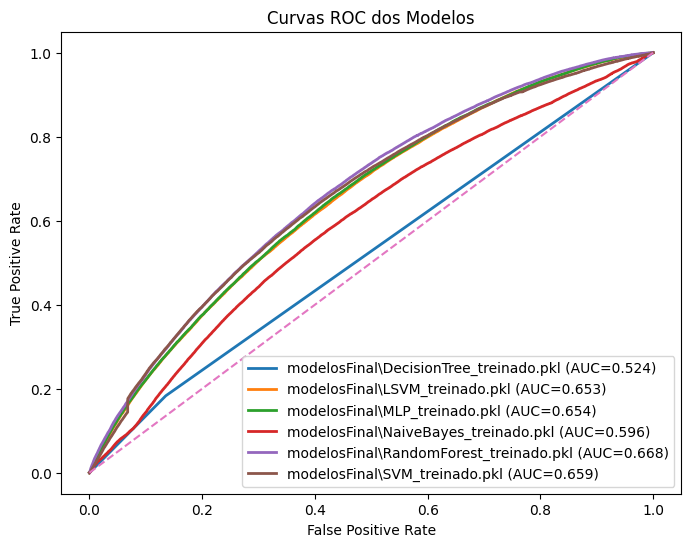

In [7]:
import glob
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Assuma que você já tem x_teste (DataFrame bruto) e y_true
# x_teste: mesmas colunas usadas no treino (nomes e tipos)
# y_true: rótulos verdadeiros do conjunto de teste

model_files = glob.glob("modelosFinal/*.pkl")
modelos = {f: joblib.load(f) for f in model_files}

plt.figure(figsize=(8, 6))
pulados = []

for caminho, modelo in modelos.items():
    nome = caminho.split("/")[-1]
    try:
        X_in = x_teste

        # Se o modelo (ou pipeline) sabe os nomes das features de entrada, alinhe por nome
        if isinstance(x_teste, pd.DataFrame) and hasattr(modelo, "feature_names_in_"):
            esperadas = list(modelo.feature_names_in_)
            faltantes = [c for c in esperadas if c not in x_teste.columns]
            if faltantes:
                raise ValueError(f"faltam colunas no x_teste: {faltantes[:5]}{'...' if len(faltantes) > 5 else ''}")
            # Reordena e remove extras
            X_in = x_teste[esperadas]

        # Obtenha os scores
        if hasattr(modelo, "predict_proba"):
            y_score = modelo.predict_proba(X_in)[:, 1]
        elif hasattr(modelo, "decision_function"):
            y_score = modelo.decision_function(X_in)
        else:
            raise AttributeError("modelo não possui predict_proba nem decision_function")

        fpr, tpr, _ = roc_curve(y_teste, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{nome} (AUC={roc_auc:.3f})')

    except Exception as e:
        pulados.append((nome, str(e)))
        continue

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC dos Modelos")
plt.legend(loc="lower right")
plt.show()

if pulados:
    print("Modelos ignorados (motivo):")
    for n, err in pulados:
        print(f"- {n}: {err}")
